In [ ]:
# Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Handling Data

# Importing Data
import mglearn # !pip install mglearn
from sklearn.datasets import load_boston
boston = load_boston()
indepX, depY = mglearn.datasets.load_extended_boston()

# Splitting Data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indepX, depY, random_state=0)

In [ ]:
# Generating Model

# Multiple Regression Model
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)
# print("MLR.coef_:{}".format(MLR.coef_))
# print("MLR.intercept_:{}".format(MLR.intercept_))

# Ridge Regression Model
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

# Lasso Regression Model
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)

In [ ]:
# Model Results
print("MLR Training Set Score:{:.2f}".format(MLR.score(X_train, y_train)))
print("MLR Test Set Score:{:.2f}".format(MLR.score(X_test, y_test)))

print("Ridge Training Set Score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge Test Set Score:{:.2f}".format(ridge.score(X_test, y_test)))

print("Lasso Training Set Score:{:.2f}".format(lasso.score(X_train, y_train)))
print("Lasso Test Set Score:{:.2f}".format(lasso.score(X_test, y_test)))

print("Number of features used:{}".format(np.sum(lasso.coef_ !=0)))

Trade-off between overfitting and underfitting
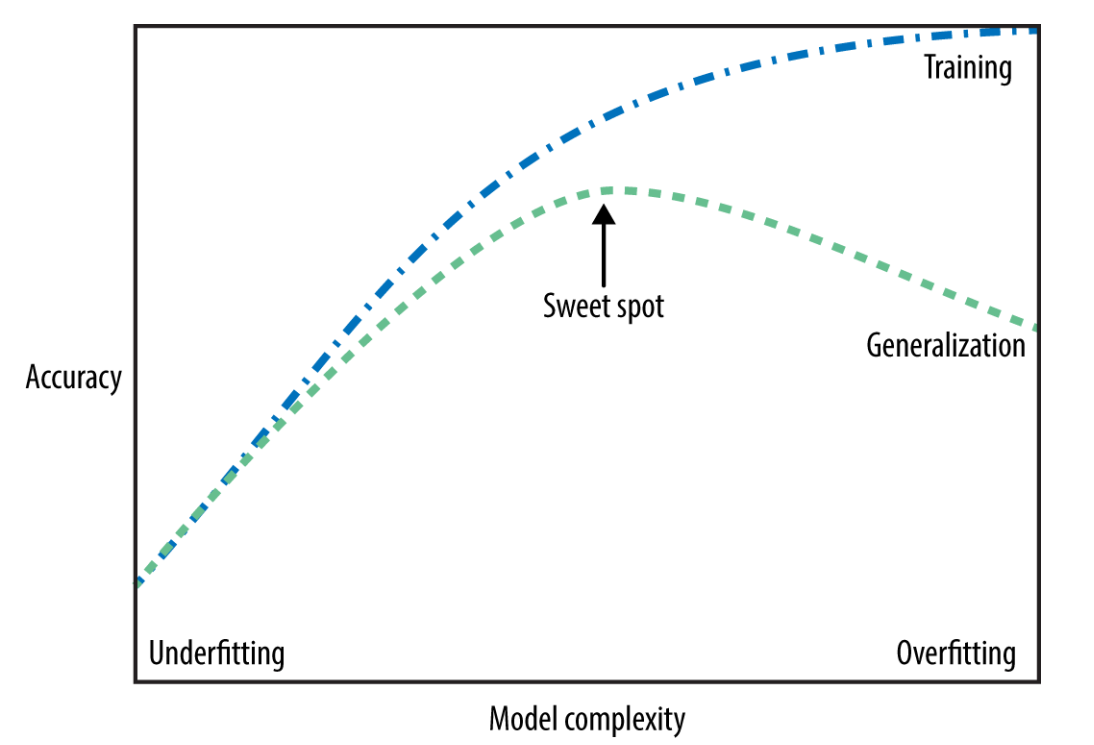

In [ ]:
# Regularization

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge10 Training Set Score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Ridge10 Test Set Score:{:.2f}".format(ridge10.score(X_test, y_test)))

ridge0_1 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge0_1 Training Set Score:{:.2f}".format(ridge0_1.score(X_train, y_train)))
print("Ridge0_1 Test Set Score:{:.2f}".format(ridge0_1.score(X_test, y_test)))

lasso01 = Lasso(alpha=0.01, max_iter= 100000).fit(X_train,y_train)
print("lasso01 Training Set Score:{:.2f}".format(lasso01.score(X_train, y_train)))
print("lasso01 Test Set Score:{:.2f}".format(lasso01.score(X_test, y_test)))

print("Number of features used in lasso01:{}".format(np.sum(lasso01.coef_ !=0)))

lasso0001 = Lasso(alpha=0.0001, max_iter= 100000).fit(X_train,y_train)
print("lasso0001 Training Set Score:{:.2f}".format(lasso0001.score(X_train, y_train)))
print("lasso0001 Test Set Score:{:.2f}".format(lasso0001.score(X_test, y_test)))

print("Number of features used in lasso0001:{}".format(np.sum(lasso0001.coef_ !=0)))

In [ ]:
# Visualization
plt.plot(lasso.coef_,"s",label="lasso alpha=1")
plt.plot(lasso01.coef_,"^",label="lasso alpha=0.01")
plt.plot(lasso0001.coef_,"v",label="lasso alpha=0.0001")
plt.plot(ridge0_1.coef_,"o",label="Ridge alpha = 0.1")
plt.xlabel("Coef Index")
plt.ylabel("Coef Magnitude")
plt.ylim(-25,25)
plt.legend(ncol = 2, loc=(0,1.05))
plt.show()